In [1]:
import os

import pandas as pd
import numpy as np
from scipy.io import savemat


## plotting ###

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### plot data

In [2]:
import warnings

warnings.filterwarnings('ignore')
import numpy as np

In [8]:
from utils.rw_utils import load_neurons
import os

neurons = load_neurons('./data/urban_data/neurons/soma_centered/', sort=False)

root, _, files = list(os.walk('./data/urban_data/neurons/soma_centered/'))[0]
sort_index = np.array(files).argsort()

neurons = np.array(neurons)[sort_index]

labels = pd.read_csv("./data/urban_data/meta_data_labeled_cells_urban.csv")

In [5]:
path_angles = np.concatenate([list(n.get_path_angles().values()) for n in neurons])
branch_angles = np.concatenate([list(n.get_branch_angles().values()) for n in neurons])

In [6]:
np.percentile(branch_angles,95)

145.5714280353125

In [7]:
np.random.seed(42)
n_samples = 1
onoffds_index = np.random.choice(np.where(labels['clusterA'] == 'clus4')[0], size=n_samples, replace=False)
soffa_index = np.random.choice(np.where(labels['clusterA'] == 'clus1')[0], size=n_samples, replace=False)
tona_index = np.random.choice(np.where(labels['clusterA'] == 'clus11')[0], size=n_samples, replace=False) 
fminion_index = np.random.choice(np.where(labels['clusterA'] == 'clus9')[0], size=n_samples, replace=False) 
type_indices = np.concatenate((soffa_index, onoffds_index, tona_index,fminion_index))

NameError: name 'labels' is not defined

In [17]:
np.random.seed(17)
type_indices = []
for c in ['clus1', 'clus2','clus4', 'clus5', 'clus6', 'clus8', 'clus10', 'clus13']:
    c_index = np.random.choice(np.where(labels['cluster'] == c)[0], size=1, replace=False)
    type_indices = np.concatenate((type_indices, c_index))
type_indices = type_indices.astype(int)

ValueError: 'a' cannot be empty unless no samples are taken

In [20]:
#cluster_ids = [int(f[4:]) for f in np.unique(labels['cluster'])[17:]]
cluster_ids = np.unique(labels['cluster'])
##cluster_ids.sort()
colors = dict(zip(['clus%i'%i for i in cluster_ids ],sns.color_palette('icefire', n_colors=15)))

In [21]:
colors

{'clus1': (0.56349779, 0.78357215, 0.81834861),
 'clus2': (0.37523981, 0.67057537, 0.80420832),
 'clus3': (0.23526251, 0.54739477, 0.8115939),
 'clus4': (0.25423116, 0.40433127, 0.78155831),
 'clus5': (0.28233561, 0.28527482, 0.58742866)}

In [23]:
labels.iloc[ix_]['cluster']

1

In [12]:
type_indices = np.array(range(5))
type_indices

array([0, 1, 2, 3, 4])

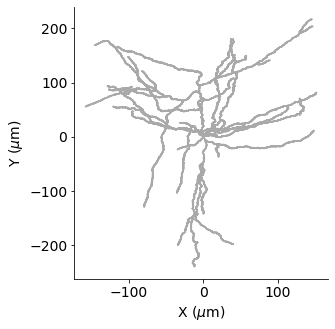

In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
neurons[0].draw_2D(fig, ax=ax1, projection='xy')

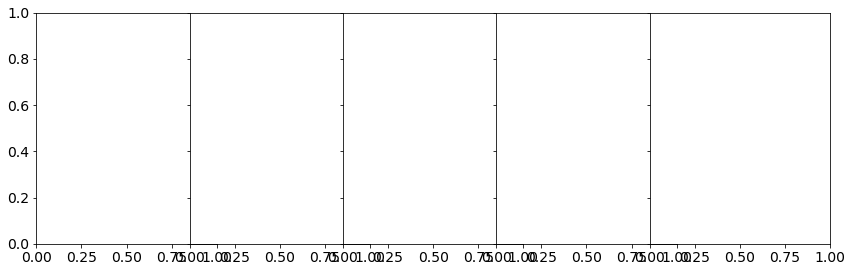

In [36]:

fig, axes = plt.subplots(1,5, sharex=True, sharey=True, figsize=(12,4))

for k, ix_ in enumerate(type_indices):
    
    c = colors[labels.iloc[ix_]['cluster']]
    print(c)
    neurons[ix_].draw_2D(ax=axes[k], dendrite_color=c, projection='xy')
    axes[k].axis('off')
    axes[k].set_aspect('equal')
    axes[k].scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    
    inset_axis = axes[k].inset_axes([.6,.8,.4,.4])
    neurons[ix_].draw_2D(ax=inset_axis, dendrite_color=c, projection='xz')
    inset_axis.axis('off')
    inset_axis.set_aspect('equal')
    
    if k == 1:
        axes[1].plot([-2,-1], [-3,-3], c='k', linewidth=2)
#         inset_axis.plot([-2,-1], [-1.5,-1.5], c='k', linewidth=3)

plt.tight_layout()
fig.subplots_adjust(wspace=-.15)
plt.savefig('./data/urban_data/Fig_urban.svg', format='svg')